In [20]:
#hypothesis testing
mod=ols('person_education~loan_status',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                  df        sum_sq   mean_sq        F    PR(>F)
loan_status      1.0      0.300357  0.300357  0.13728  0.711002
Residual     44998.0  98452.043443  2.187920      NaN       NaN


**p value >0.05 so person_education is a bad predictor**

In [21]:
#hypothesis testing
mod=ols('person_income~loan_status',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                  df        sum_sq       mean_sq           F         PR(>F)
loan_status      1.0  5.367930e+12  5.367930e+12  845.525887  3.483099e-184
Residual     44998.0  2.856756e+14  6.348629e+09         NaN            NaN


**p value >0.05 so person income is a good predictor**

In [22]:
#hypothesis testing
mod=ols('person_emp_exp~loan_status',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                  df        sum_sq     mean_sq          F    PR(>F)
loan_status      1.0  6.940129e+02  694.012857  18.883771  0.000014
Residual     44998.0  1.653758e+06   36.751815        NaN       NaN


**p value <0.05 so person_emp_exp is a good predictor**

**person_home_ownership is a nominal form**

In [23]:
df['person_home_ownership']= le.fit_transform(df['person_home_ownership'])
df.person_home_ownership.value_counts()

,count
person_home_ownership,
3,23443
0,18489
2,2951
1,117


In [24]:
#hypothesis testing
mod=ols('person_home_ownership~loan_status',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                  df        sum_sq      mean_sq            F  PR(>F)
loan_status      1.0   5105.880406  5105.880406  2602.906481     0.0
Residual     44998.0  88268.406171     1.961607          NaN     NaN


**p value <0.05 so person_home_ownership is a good predictor**

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
features = ["loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

for col in features:
    formula = f'{col} ~ loan_status'
    mod = ols(formula, data=df).fit()
    aov = sm.stats.anova_lm(mod)
    print(f"\nANOVA for {col}:\n", aov)



ANOVA for loan_amnt:
                   df        sum_sq       mean_sq           F         PR(>F)
loan_status      1.0  2.082006e+10  2.082006e+10  528.213632  3.236704e-116
Residual     44998.0  1.773641e+12  3.941599e+07         NaN            NaN

ANOVA for loan_int_rate:
                   df         sum_sq       mean_sq           F  PR(>F)
loan_status      1.0   44012.525884  44012.525884  5574.45426     0.0
Residual     44998.0  355277.045482      7.895396         NaN     NaN

ANOVA for loan_percent_income:
                   df      sum_sq    mean_sq           F  PR(>F)
loan_status      1.0   50.700234  50.700234  7824.79403     0.0
Residual     44998.0  291.561560   0.006479         NaN     NaN

ANOVA for cb_person_cred_hist_length:
                   df         sum_sq     mean_sq         F    PR(>F)
loan_status      1.0     149.380002  149.380002  9.926174  0.001631
Residual     44998.0  677179.456243   15.049101       NaN       NaN

ANOVA for credit_score:
                  

###**from above we can conclude that only credit score is the bad predictor**

# previous_loan_defaults_on_file Nominal

In [26]:
df['previous_loan_defaults_on_file']= le.fit_transform(df['previous_loan_defaults_on_file'])
df.person_education.value_counts()

,count
person_education,
1,13399
0,12028
3,11972
4,6980
2,621


In [27]:
#hypothesis testing
mod=ols('previous_loan_defaults_on_file~loan_status',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                  df       sum_sq      mean_sq             F  PR(>F)
loan_status      1.0  3317.385168  3317.385168  18824.727466     0.0
Residual     44998.0  7929.766743     0.176225           NaN     NaN


**previous_loan_defaults_on_file is a good predictor**

<Figure size 1000x600 with 0 Axes>

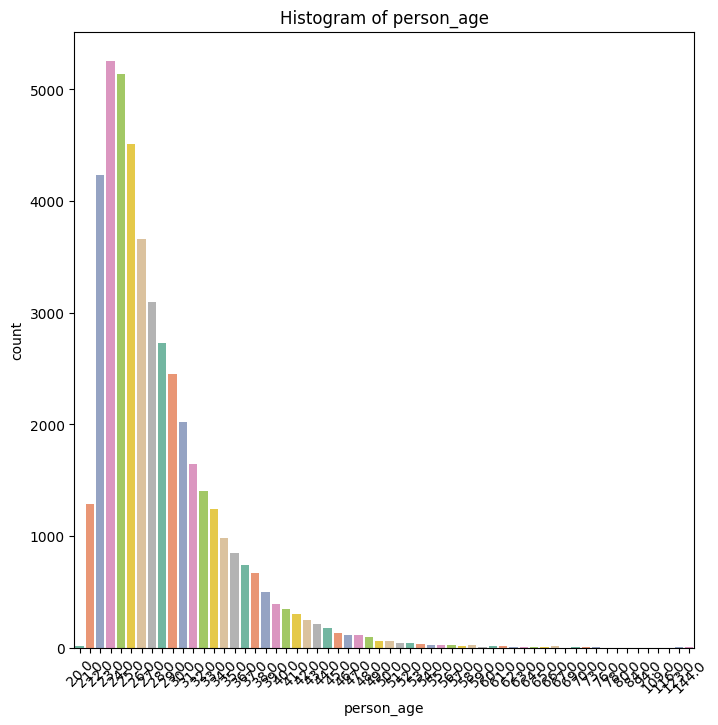

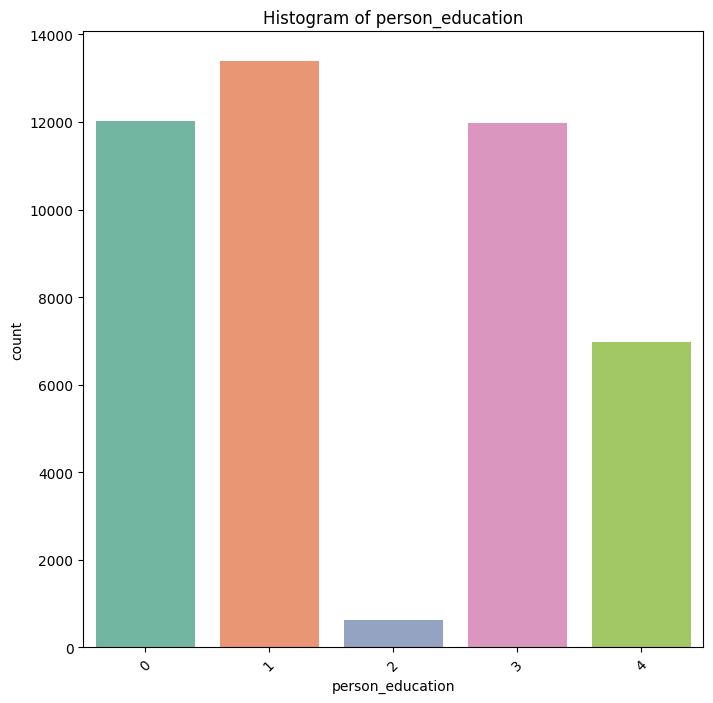

KeyboardInterrupt: 

In [28]:
features = ["person_age",	"person_education","person_income"	,"person_emp_exp"	,"person_home_ownership",	"loan_amnt"	,"loan_int_rate"	,"loan_percent_income"	,"cb_person_cred_hist_length",	"credit_score"	,"previous_loan_defaults_on_file"]
plt.figure(figsize=(10, 6))
for col in features:
    plt.figure(figsize=(8, 8))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [33]:
from scipy.stats import chi2_contingency
c1 = pd.crosstab(df.loan_status, df.person_age)
chi2_contingency (c1, correction = False)

Chi2ContingencyResult(statistic=135.92819265352205, pvalue=5.2342909843141084e-08, dof=59, expected_freq=array([[1.32222222e+01, 1.00255556e+03, 3.29466667e+03, 4.08644444e+03,
        3.99622222e+03, 3.50544444e+03, 2.84588889e+03, 2.40722222e+03,
        2.12177778e+03, 1.90944444e+03, 1.57188889e+03, 1.27944444e+03,
        1.09122222e+03, 9.64444444e+02, 7.62222222e+02, 6.58777778e+02,
        5.75555556e+02, 5.18000000e+02, 3.91222222e+02, 3.02555556e+02,
        2.71444444e+02, 2.35666667e+02, 1.92111111e+02, 1.67222222e+02,
        1.37666667e+02, 1.05000000e+02, 8.86666667e+01, 8.71111111e+01,
        7.23333333e+01, 4.58888889e+01, 4.35555556e+01, 3.57777778e+01,
        3.26666667e+01, 2.72222222e+01, 1.86666667e+01, 1.86666667e+01,
        1.55555556e+01, 1.32222222e+01, 1.55555556e+01, 4.66666667e+00,
        1.24444444e+01, 9.33333333e+00, 5.44444444e+00, 2.33333333e+00,
        5.44444444e+00, 7.77777778e+00, 8.55555556e+00, 7.77777778e-01,
        3.88888889e+00, 5.44444

**there is a significant association between the two variables**

In [ ]:
from scipy.stats import chi2_contingency
c1 = pd.crosstab(df.loan_status, df.person_age)
chi2_contingency (c1, correction = False)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

### Check VIF for each features

In [34]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = [
    "person_age", "person_education", "person_income", "person_emp_exp",
    "person_home_ownership", "loan_amnt", "loan_int_rate", "loan_percent_income",
    "cb_person_cred_hist_length", "credit_score", "previous_loan_defaults_on_file"
]
X = df[features]

X = X + 1e-10
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                           Feature         VIF
0                       person_age  165.058092
1                 person_education    2.383322
2                    person_income    2.881498
3                   person_emp_exp   12.042801
4            person_home_ownership    2.753282
5                        loan_amnt    7.241091
6                    loan_int_rate   15.066833
7              loan_percent_income    7.803302
8       cb_person_cred_hist_length   12.135680
9                     credit_score   92.113705
10  previous_loan_defaults_on_file    2.165352


In [35]:
columns_to_drop = ['person_emp_exp  ', 'loan_int_rate ', 'cb_person_cred_hist_length ', 'credit_score']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_education                45000 non-null  int64  
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   person_home_ownership           45000 non-null  int64  
 5   loan_amnt                       45000 non-null  float64
 6   loan_int_rate                   45000 non-null  float64
 7   loan_percent_income             45000 non-null  float64
 8   cb_person_cred_hist_length      45000 non-null  float64
 9   previous_loan_defaults_on_file  45000 non-null  int64  
 10  loan_status                     45000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.8 MB


In [36]:
X = df.loc[:, df.columns != 'loan_status']
y= df.loc[:, df.columns == 'loan_status']

In [37]:
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_encoded = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)


### Fitting the model

In [40]:
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [41]:
y_pred = model1.predict(X_test)

## confusion matrix

In [42]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[6876  135]
 [1654  335]]


# **accuracy**

In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.12%


### Classification Report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7011
           1       0.71      0.17      0.27      1989

    accuracy                           0.80      9000
   macro avg       0.76      0.57      0.58      9000
weighted avg       0.79      0.80      0.75      9000



### ROC curve

In [45]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7533736936691957


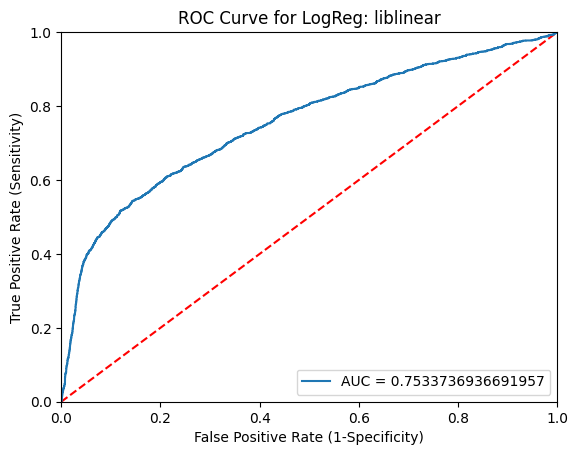

In [46]:
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.plot(fpr, tpr, label='AUC = ' + str(roc_auc))

plt.legend(loc=4)
plt.show()

SUMMARY :


model shows a **ROC-AUC score of 0.7533**, indicating a good ability to distinguish between loan defaulters and non-defaulters. With **accuracy  80.12%**model correctly identifies loan status cases. although the model performs well overall, it may need improvement in detecting actual loan defaults, possibly by adjusting  improving feature selection.